# Quantum CHSH game

- **CHSH Inequality Violation** - add more description

# imports

In [1]:
from qiskit.circuit import QuantumCircuit
from qiskit.primitives import Estimator, Sampler
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_histogram

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background') # optional

## CHSH Inequality

CHSH ineqiality is named after Clauster, Horne, Shimony and Holt can be used to prove Bell's inequality ( for this proof, Nobel prize in physics was awarded in 2022)

In this experiment, we have 2 parties: Alice and Bob. For a given entangled qbit, we Alice will mesure it in 2 bases. For first cubit, bases will be A and a, and for second B and b. So we have:

$$
\langle CHSH \rangle = \langle AB \rangle - \langle Ab \rangle + \langle aB \rangle + \langle ab \rangle ?
$$

 Alice and Bob both have a qbit, and by measuring their state (qbit), they obtain either 1 or -1 which are the eigeivalues for  $|0\rangle$ and $|1\rangle$, respectively.
We conclude that the quantities $(B-b)$ or $(B+b)$ can only be 0 or $ \pm 2$, so the total expression above can only have the values of $ \pm 2 $
$$
|\langle CHSH \rangle| = |\langle AB \rangle - \langle Ab \rangle + \langle aB \rangle + \langle ab \rangle| \le 2.
$$

If we assume locality ( no information travels faster than the speed of light) and realism ( things exist iregardless of whether they are measured or not ), even if this system depended on a set of local hidden varables, the quantity of $CHSH$ should be bound by 2 non the less.

But what happens in the quantum case, when the system is entangled?

First, we build our "observer" or "withess" or "refree":
$$
CHSH = A(B-b) + a(B+b) = AB - Ab + aB +ab
$$
where $A, a$ are each one of $\{IX, IZ\}$ for qubit 0 and $B, b$ are each one of $\{XI, ZI\}$ for qubit 1 (corresponding to little-endian notation). Paulis on different qubits can be composed by specifying order with a Pauli string, for example instantiating a `SparsePauliOp` with the `'ZX'` argument implies a measurement of $\langle X \rangle$ on `q0` and $\langle Z \rangle$ on `q1` . This *tensor* product (combining operations on *different* qubits) can be explicitly stated using the `.tensor()` method. Additionally, combining operations on the *same* qubit(s) uses the *compositional* product with the `.compose()` method. For example, all these statements create the same Pauli operator:

Part 1 - createing the CHSH "witness" in operator form:

In [2]:
obsv = SparsePauliOp('IX').compose(SparsePauliOp('XI') - SparsePauliOp('ZI')) + SparsePauliOp('IZ').compose(SparsePauliOp('XI') + SparsePauliOp('ZI'))


### Creating Entangled Qubit Pair

Next we want to test the $CHSH$ observable on an entangled pair, for example the maximally-entangled Bell state
$$
|\Phi\rangle = \frac{1}{\sqrt{2}} \left(|00\rangle + |11\rangle \right)
$$
which is created with a Hadamard gate followed by a CNOT with the target on the same qubit as the Hadamard. Due to the simplifaction of measuring in just the $X$- and $Z$-bases , we will *rotate* the Bell state around the Bloch sphere which is equivalant to changing the measurement basis. This produces the state
$$
|\psi\rangle = \frac{1}{\sqrt{2}} \left(\cos(\theta/2) |00\rangle + \sin(\theta/2)|11\rangle \right)
$$

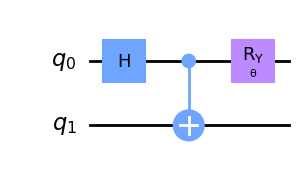

In [5]:
from qiskit.circuit import Parameter

theta = Parameter('θ')

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.ry(theta, 0)

qc.draw('mpl')

Next we need to specify a `Sequence` of `Parameter`s that show a clear violation of the CHSH Inequality, namely 
$$
|\langle CHSH \rangle| > 2.
$$
Chosing at least 3 points for parametrisation

Part 2 - Createing parametrization

In [6]:
pi = np.pi
angles = [[2.8*pi/4], [pi/1.8], [pi/1.7]]

Testing angles and observable by running with the `Estimator`.

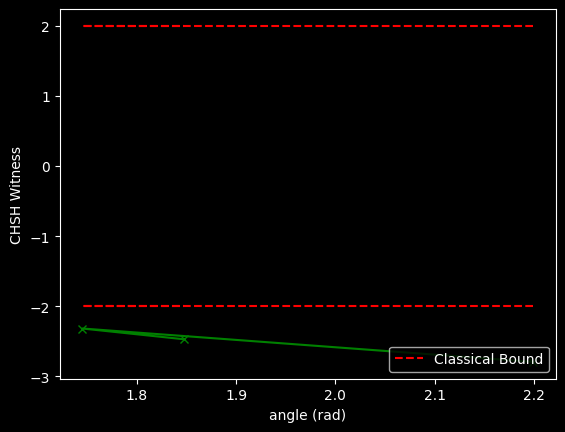

In [7]:
estimator = Estimator()
job = estimator.run([qc]*len(angles), observables=[obsv]*len(angles), parameter_values=angles)
exps = job.result().values

plt.plot(angles, exps, marker='x', ls='-', color='green')
plt.plot(angles, [2]*len(angles), ls='--', color='red', label='Classical Bound')
plt.plot(angles, [-2]*len(angles), ls='--', color='red')
plt.xlabel('angle (rad)')
plt.ylabel('CHSH Witness')
plt.legend(loc=4)